In [7]:
import market as mkt
from datetime import datetime, timedelta
sim = mkt.Simulator(file_path="data/688001.SH/20220812/逐笔委托.csv")

In [8]:
sim.reset()
time = datetime(year=2022, month=8, day=12)+ timedelta(hours=9, minutes=15, seconds=0)
end_time = datetime(year=2022, month=8, day=12)+ timedelta(hours=15, minutes=00, seconds=0)
while time < end_time:
    time = sim.next_step()
print(sim.order_book)

2022-08-12 15:00:00
    bid_v  bid_p  ask_p  ask_v
0     166  36.36  36.00    130
1   10946  36.35  36.08   2000
2    2611  36.34  36.10   6571
3    6170  36.33  36.15   2000
4    2035  36.32  36.17    212
5    5981  36.31  36.40    515
6   22970  36.30  36.48   3171
7    2180  36.29  36.49   5900
8     169  36.27  36.50   7200
9    1937  36.26  36.56    300
10   6526  36.25  36.58   1600


In [9]:
sim.order_book.historical_deal

,time,price,vol,bid_uid,ask_uid
0,2022-08-12 09:25:00.000,37.45,1200,0,0
1,2022-08-12 09:30:01.120,37.44,126,137124,158235
2,2022-08-12 09:30:01.720,37.44,92,137124,164297
3,2022-08-12 09:30:02.420,37.40,200,137141,172886
4,2022-08-12 09:30:03.460,37.40,60,137141,186466
...,...,...,...,...,...
3281,2022-08-12 14:55:43.170,36.36,110,3249142,5031055
3282,2022-08-12 14:56:00.200,36.36,131,3249142,5037996
3283,2022-08-12 14:56:26.450,36.36,134,3249142,5050149
3284,2022-08-12 14:56:26.450,36.36,166,4091359,5050149


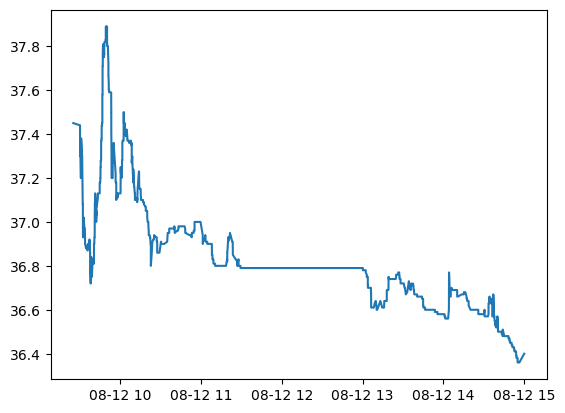

In [10]:
import matplotlib.pyplot as plt
plt.plot(sim.order_book.historical_deal["time"], sim.order_book.historical_deal["price"])
